In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 

In [2]:
divorce = pd.read_csv("/content/divorce.csv")

In [3]:
data = divorce.copy()

In [4]:
data.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [8]:
list(data.columns)

['Sorry_end',
 'Ignore_diff',
 'begin_correct',
 'Contact',
 'Special_time',
 'No_home_time',
 '2_strangers',
 'enjoy_holiday',
 'enjoy_travel',
 'common_goals',
 'harmony',
 'freeom_value',
 'entertain',
 'people_goals',
 'dreams',
 'love',
 'happy',
 'marriage',
 'roles',
 'trust',
 'likes',
 'care_sick',
 'fav_food',
 'stresses',
 'inner_world',
 'anxieties',
 'current_stress',
 'hopes_wishes',
 'know_well',
 'friends_social',
 'Aggro_argue',
 'Always_never',
 'negative_personality',
 'offensive_expressions',
 'insult',
 'humiliate',
 'not_calm',
 'hate_subjects',
 'sudden_discussion',
 "idk_what's_going_on",
 'calm_breaks',
 'argue_then_leave',
 'silent_for_calm',
 'good_to_leave_home',
 'silence_instead_of_discussion',
 'silence_for_harm',
 'silence_fear_anger',
 "I'm_right",
 'accusations',
 "I'm_not_guilty",
 "I'm_not_wrong",
 'no_hesitancy_inadequate',
 "you're_inadequate",
 'incompetence',
 'Divorce_Y_N']

In [12]:
def all_info(data):
  for i in data.columns:
    print("--------------------------------------------------------------------------------------------------")
    print(i)
    print(data.groupby(data['Divorce_Y_N'])[i].describe())


In [14]:
all_info(data)

--------------------------------------------------------------------------------------------------
Sorry_end
             count      mean       std  min  25%  50%  75%  max
Divorce_Y_N                                                    
0             86.0  0.395349  0.898090  0.0  0.0  0.0  0.0  4.0
1             84.0  3.190476  0.752125  0.0  3.0  3.0  4.0  4.0
--------------------------------------------------------------------------------------------------
Ignore_diff
             count      mean       std  min  25%  50%  75%  max
Divorce_Y_N                                                    
0             86.0  0.465116  0.762313  0.0  0.0  0.0  1.0  3.0
1             84.0  2.869048  0.915460  0.0  2.0  3.0  4.0  4.0
--------------------------------------------------------------------------------------------------
begin_correct
             count      mean       std  min  25%  50%  75%  max
Divorce_Y_N                                                    
0             86.0  0.63953

In [19]:
X = data.drop(columns = ['Divorce_Y_N'],axis = 1)
Y = data['Divorce_Y_N']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [23]:
print(X.shape,X_test.shape,X_train.shape)

(170, 54) (34, 54) (136, 54)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)
train_predicit = model.predict(X_train)
test_predict = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
ac = accuracy_score
score1 = ac(Y_train,train_predicit)
score2 = ac(Y_test,test_predict)
print(score1)
print(score2)

1.0
0.9411764705882353


In [31]:
input_data = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,2,0,2,2,2,2,2,2,2]
in_array_data = np.array(input_data)
reshape_data = in_array_data.reshape(1,-1)
prediction = model.predict(reshape_data)
if prediction[0]==1:
  print("that's have a divorsed")
else:
  print('happy marriage')

happy marriage


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


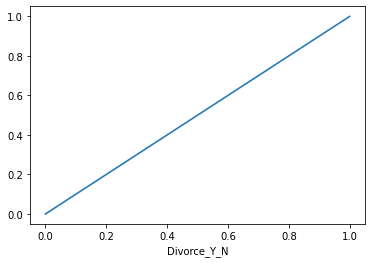

In [33]:
sns.lineplot(Y_train,train_predicit)
plt.show()